# Absorbing boundary condition - 1D case

Gen Kuroki

2021-06-21

1D Wave equation on the interval $[a, b]$ with absorbing boundary condition:

$$
\begin{aligned}
&
\frac{\partial^2 u}{\partial t^2} = \frac{\partial^2 u}{\partial x^2} \quad (a\le x \le b), 
\\ &
\left.\left(\frac{\partial}{\partial t} - \frac{\partial}{\partial x}\right)u\;\right|_{x = a} = 0,
\\ &
\left.\left(\frac{\partial}{\partial t} + \frac{\partial}{\partial x}\right)u\;\right|_{x = b} = 0.
\end{aligned}
$$

The second equation means backward wave only and the third means forward wave only.

Its discretization: $dx = (b-a)/n$, $x = a + k\,dx$, $k=0,1,\ldots,n$,

$$
\begin{aligned}
&
u_{tt}(t, x) = \frac{u(t, x - dx) + u(t, x + dx) - 2u(t, x)}{dx^2} \quad (a\le x\le b),
\\ &
u_t(t, a) - \frac{u(t, a+dx) - u(t, a-dx)}{2dx} = 0,
\\ &
u_t(t, b) + \frac{u(t, b+dx) - u(t, b-dx)}{2dx} = 0.
\end{aligned}
$$

The second and third equations are equivalent to

$$
\begin{aligned}
&
u(t, a-dx) = u(t, a+dx) - 2u_t(t, a)\,dx, 
\\ &
u(t, b+dx) = u(t, b-dx) - 2u_t(t, b)\,dx.
\end{aligned}
$$

Therefore the discretization above can be rewritten as

$$
\begin{aligned}
&
u_{tt}(t, x) = \frac{u(t, x - dx) + u(t, x + dx) - 2u(t, x)}{dx^2} \quad (a < x < b),
\\ &
u_{tt}(t, a) = 2\left(\frac{u(t, a + dx) - u(t, a)}{dx^2} - \frac{u_t(t, a)}{dx}\right),
\\ &
u_{tt}(t, b) = 2\left(\frac{u(t, b - dx) - u(t, b)}{dx^2} - \frac{u_t(t, b)}{dx}\right).
\end{aligned}
$$

In [1]:
@show VERSION
@time using DifferentialEquations
@time using ForwardDiff
@time using Plots

VERSION = v"1.8.0-DEV.57"
  9.917914 seconds (26.29 M allocations: 1.811 GiB, 5.17% gc time)
  0.087986 seconds (97.77 k allocations: 5.684 MiB, 99.46% compilation time)
  4.709775 seconds (9.88 M allocations: 688.690 MiB, 9.91% gc time, 0.37% compilation time)


In [2]:
function f2_abc!(dv, v, u, p, t)
    (; dx) = p
    a, b = firstindex(u), lastindex(u)
    @. @views dv[a+1:b-1] = (u[a:b-2] + u[a+2:b] - 2u[a+1:b-1])/dx^2
    dv[a] = 2((u[a+1] - u[a])/dx^2 - v[a]/dx)
    dv[b] = 2((u[b-1] - u[b])/dx^2 - v[b]/dx)
    return
end

f2_abc! (generic function with 1 method)

┌ Info: Saved animation to 
│   fn = D:\OneDrive\public\0006\1d_wave_eq_abc_21.gif
└ @ Plots D:\.julia\packages\Plots\FKcum\src\animation.jl:104


Plots.AnimatedGif("D:\\OneDrive\\public\\0006\\1d_wave_eq_abc_21.gif")
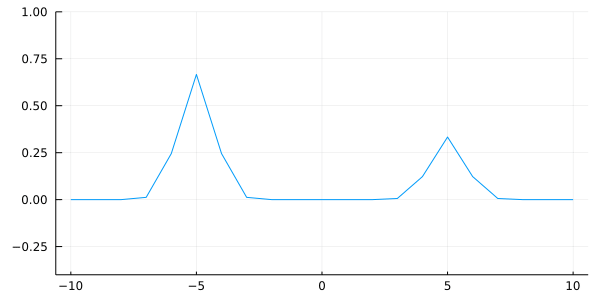

In [3]:
x = range(-10, 10; length=21)
dx = step(x)
p = (; dx)

U(t, x) = 2/3*exp(-(x - t + 5)^2) + 1/3*exp(-(x + t - 5)^2)
V(t, x) = ForwardDiff.derivative(t -> U(t, x), t)
u0 = U.(0, x)
v0 = V.(0, x)
tspan = (0.0, 40.0)

prob = SecondOrderODEProblem(f2_abc!, v0, u0, tspan, p)
sol = solve(prob)

ts = range(sol.prob.tspan...; length=200)
anim = @animate for t in [fill(ts[begin], 10); ts; fill(ts[end], 10)]
    plot(x, sol(t)[end÷2+1:end]; label="", ylim=(-0.4, 1.0), size=(600, 300))
end
gif(anim, "1d_wave_eq_abc_21.gif")

┌ Info: Saved animation to 
│   fn = D:\OneDrive\public\0006\1d_wave_eq_abc_201.gif
└ @ Plots D:\.julia\packages\Plots\FKcum\src\animation.jl:104


Plots.AnimatedGif("D:\\OneDrive\\public\\0006\\1d_wave_eq_abc_201.gif")
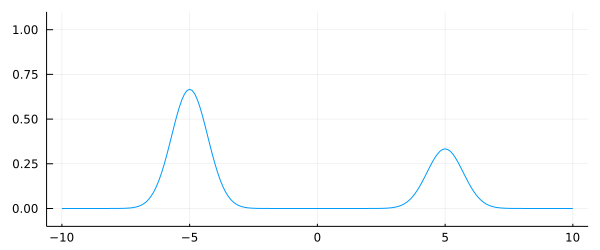

In [4]:
x = range(-10, 10; length=201)
dx = step(x)
p = (; dx)

U(t, x) = 2/3*exp(-(x - t + 5)^2) + 1/3*exp(-(x + t - 5)^2)
V(t, x) = ForwardDiff.derivative(t -> U(t, x), t)
u0 = U.(0, x)
v0 = V.(0, x)
tspan = (0.0, 20.0)

prob = SecondOrderODEProblem(f2_abc!, v0, u0, tspan, p)
sol = solve(prob)

ts = range(sol.prob.tspan...; length=100)
anim = @animate for t in [fill(ts[begin], 10); ts; fill(ts[end], 10)]
    plot(x, sol(t)[end÷2+1:end]; label="", ylim=(-0.1, 1.1), size=(600, 250))
end
gif(anim, "1d_wave_eq_abc_201.gif")